In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os 
from time import time
from time import sleep

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video
type(data)
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#This normalizes the data and makes it all pretty in a dataframe

pd.json_normalize(data['data'])
 

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10567,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954964e+07,1.954964e+07,False,NaN,1,NaN,NaN,None,2023-11-22T13:00:00.000Z,36570.011111,2.871092e+10,44.9479,0.275552,-1.661294,1.004643,19.256068,37.583082,38.616297,7.149307e+11,51.4288,7.679702e+11,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7832,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202490e+08,1.202490e+08,True,NaN,2,NaN,NaN,None,2023-11-22T13:00:00.000Z,2022.853292,1.572598e+10,36.1152,0.334121,0.538649,0.359330,20.601901,27.008485,21.316922,2.432461e+11,17.4978,2.432461e+11,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,66235,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.830865e+10,9.061454e+10,True,NaN,3,NaN,NaN,None,2023-11-22T12:59:00.000Z,1.000369,5.391233e+10,38.7554,0.017903,0.017586,-0.008280,0.012796,0.026658,0.081719,8.834125e+10,6.3540,9.064799e+10,None,2023-11-22T12:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1778,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517001e+08,1.517001e+08,False,NaN,4,NaN,NaN,None,2023-11-22T12:59:00.000Z,234.059723,2.608830e+09,58.2760,0.024868,-9.807069,-6.619949,6.409713,11.009044,6.833148,3.550687e+10,2.5538,3.550687e+10,None,2023-11-22T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1148,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,None,2023-11-22T13:00:00.000Z,0.595436,1.712855e+09,41.6012,0.126333,-2.971632,-6.805383,12.239733,16.477031,13.718290,3.198584e+10,2.3006,5.954365e+10,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,15064,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.434724e+10,2.434724e+10,False,NaN,6,NaN,NaN,None,2023-11-22T13:00:00.000Z,1.000094,7.427747e+09,33.5960,-0.001188,0.022795,-0.000172,0.025631,-0.001949,0.004282,2.434952e+10,1.7516,2.434952e+10,None,2023-11-22T13:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,5426,Solana,SOL,solana,553,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.231048e+08,5.631571e+08,True,NaN,7,NaN,NaN,None,2023-11-22T13:00:00.000Z,54.949738,2.524983e+09,29.5251,0.683674,-2.458479,-13.413439,85.791024,182.587346,154.209692,2.324950e+10,1.6725,3.094533e+10,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,979,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.528845e+10,3.638042e+10,False,NaN,8,NaN,NaN,None,2023-11-22T12:59:00.000Z,0.370827,4.361285e+08,27.3377,0.509465,-2.165487,0.252083,40.167257,50.881610,39.273042,1.308592e+10,0.9412,1.668723e+10,None,2023-11-22T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,829,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.419338e+11,1.419338e+11,True,NaN,9,NaN,NaN,None,2023-11-22T13:00:00.000Z,0.074437,7.920992e+08,19.1701,0.105988,-3.376219,-0.260236,15.564715,20.788818,17.339262,1.056509e+10,0.7599,1.056509e+10,None,2023-11-22T13:00:00.000Z,NaN,NaN

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df["timestamp"] = pd.to_datetime("now")
df = pd.concat([df, df], axis = 0)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10567,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.954964e+07,1.954964e+07,False,NaN,1,NaN,NaN,None,2023-11-22T13:00:00.000Z,36570.011111,2.871092e+10,44.9479,0.275552,-1.661294,1.004643,19.256068,37.583082,38.616297,7.149307e+11,51.4288,7.679702e+11,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-22 14:01:21.853500
1,1027,Ethereum,ETH,ethereum,7832,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202490e+08,1.202490e+08,True,NaN,2,NaN,NaN,None,2023-11-22T13:00:00.000Z,2022.853292,1.572598e+10,36.1152,0.334121,0.538649,0.359330,20.601901,27.008485,21.316922,2.432461e+11,17.4978,2.432461e+11,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-22 14:01:21.853500
2,825,Tether USDt,USDT,tether,66235,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.830865e+10,9.061454e+10,True,NaN,3,NaN,NaN,None,2023-11-22T12:59:00.000Z,1.000369,5.391233e+10,38.7554,0.017903,0.017586,-0.008280,0.012796,0.026658,0.081719,8.834125e+10,6.3540,9.064799e+10,None,2023-11-22T12:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-22 14:01:21.853500
3,1839,BNB,BNB,bnb,1778,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517001e+08,1.517001e+08,False,NaN,4,NaN,NaN,None,2023-11-22T12:59:00.000Z,234.059723,2.608830e+09,58.2760,0.024868,-9.807069,-6.619949,6.409713,11.009044,6.833148,3.550687e+10,2.5538,3.550687e+10,None,2023-11-22T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-22 14:01:21.853500
4,52,XRP,XRP,xrp,1148,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.371831e+10,9.998822e+10,False,NaN,5,NaN,NaN,None,2023-11-22T13:00:00.000Z,0.595436,1.712855e+09,41.6012,0.126333,-2.971632,-6.805383,12.239733,16.477031,13.718290,3.198584e+10,2.3006,5.954365e+10,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-22 14:01:21.853500
5,3408,USDC,USDC,usd-coin,15064,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.434724e+10,2.434724e+10,False,NaN,6,NaN,NaN,None,2023-11-22T13:00:00.000Z,1.000094,7.427747e+09,33.5960,-0.001188,0.022795,-0.000172,0.025631,-0.001949,0.004282,2.434952e+10,1.7516,2.434952e+10,None,2023-11-22T13:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-22 14:01:21.853500
6,5426,Solana,SOL,solana,553,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.231048e+08,5.631571e+08,True,NaN,7,NaN,NaN,None,2023-11-22T13:00:00.000Z,54.949738,2.524983e+09,29.5251,0.683674,-2.458479,-13.413439,85.791024,182.587346,154.209692,2.324950e+10,1.6725,3.094533e+10,None,2023-11-22T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-22 14:01:21.853500
7,2010,Cardano,ADA,cardano,979,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.528845e+10,3.638042e+10,False,NaN,8,NaN,NaN,None,2023-11-22T12:59:00.000Z,0.370827,4.361285e+08,27.3377,0.509465,-2.165487,0.252083,40.167257,50.881610,39.273042,1.308592e+10,0.9412,1.668723e+10,None,2023-11-22T12:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-22 14:01:21.853500
8,74,Dogecoin,DOGE,dogecoin,829,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.419338

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    # Concatenating along rows (axis=0)
    df = pd.concat([df, df2], axis=0)


    # Use this if you want to create a csv and append data to it
    if not os.path.isfile(r'C:\Users\uulm\Desktop\Projects\Python\API.csv'):
        df2.to_csv(r'C:\Users\uulm\Desktop\Projects\Python\API.csv', header='column_names')
    else:
        df2.to_csv(r'C:\Users\uulm\Desktop\Projects\Python\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [6]:
type(df)

pandas.core.frame.DataFrame

In [24]:
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df

In [ ]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [ ]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.27555
             quote.USD.percent_change_24h    -1.66129
             quote.USD.percent_change_7d      1.00464
             quote.USD.percent_change_30d    19.25607
             quote.USD.percent_change_60d    37.58308
             quote.USD.percent_change_90d    38.61630
Ethereum     quote.USD.percent_change_1h      0.33412
             quote.USD.percent_change_24h     0.53865
             quote.USD.percent_change_7d      0.35933
             quote.USD.percent_change_30d    20.60190
             quote.USD.percent_change_60d    27.00849
             quote.USD.percent_change_90d    21.31692
Tether USDt  quote.USD.percent_change_1h      0.01790
             quote.USD.percent_change_24h     0.01759
             quote.USD.percent_change_7d     -0.00828
             quote.USD.percent_change_30d     0.01280
             quote.USD.percent_change_60d     0.02666
             quote.USD.percent_change_90

In [ ]:
type(df4)

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [14]:
df5.count()

values    60
dtype: int64

In [ ]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(60))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

In [17]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27555
1,Bitcoin,quote.USD.percent_change_24h,-1.66129
2,Bitcoin,quote.USD.percent_change_7d,1.00464
3,Bitcoin,quote.USD.percent_change_30d,19.25607
4,Bitcoin,quote.USD.percent_change_60d,37.58308
5,Bitcoin,quote.USD.percent_change_90d,38.61630
6,Ethereum,quote.USD.percent_change_1h,0.33412
7,Ethereum,quote.USD.percent_change_24h,0.53865
8,Ethereum,quote.USD.percent_change_7d,0.35933
9,Ethereum,quote.USD.percent_change_30d,20.60190


In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\uulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


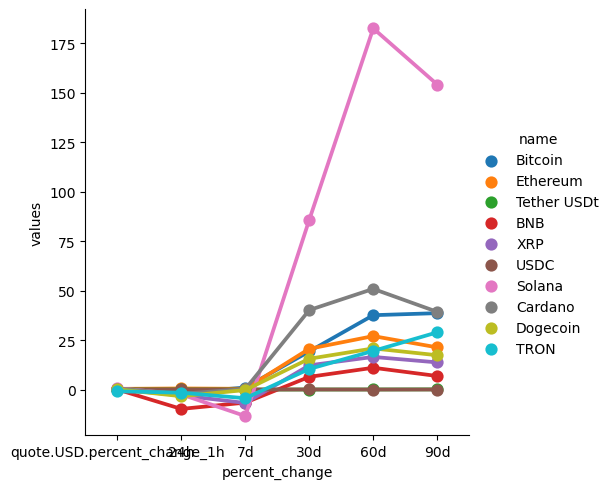

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

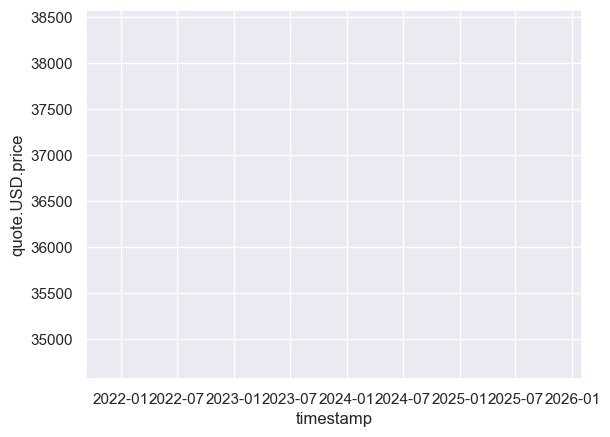

In [23]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)